In [84]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt

# Scale 변환:평균,표준편차 기준
from sklearn.preprocessing import StandardScaler
# linkage: 계층형 군집분석, dendrogram: 계층구조 나무, cluster: linkage로부터 얻은 값으로 군집 생성

import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import train_test_split

In [85]:
plt.rcParams['font.family'] = 'NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [86]:
df_raw = pd.read_csv('./SCALE_preprossed.csv')
df_raw.head()

,scale,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group,bf_temp
0,양품,미국,T,32,3700,15100,적용,1호기,1열,1144,116,1133,59,259,TMCP(온도제어),934.0,8,1조,199.0
1,양품,미국,T,32,3700,15100,적용,1호기,2열,1144,122,1135,53,238,TMCP(온도제어),937.0,8,1조,198.0
2,양품,영국,T,33,3600,19200,적용,2호기,1열,1129,116,1121,55,258,TMCP(온도제어),889.0,8,1조,232.0
3,양품,영국,T,33,3600,19200,적용,2호기,2열,1152,125,1127,68,266,TMCP(온도제어),885.0,8,1조,242.0
4,양품,프랑스,T,38,3100,13300,적용,3호기,1열,1140,134,1128,48,246,TMCP(온도제어),873.0,8,1조,255.0


In [87]:
# 목표변수/설명변수 분리
df_raw_x = df_raw.drop("scale", axis = 1, inplace = False)
df_raw_y = df_raw["scale"] 

display("설명변수:", df_raw_x.head())
display("목표변수:",df_raw_y.head())

'설명변수:'

,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group,bf_temp
0,미국,T,32,3700,15100,적용,1호기,1열,1144,116,1133,59,259,TMCP(온도제어),934.0,8,1조,199.0
1,미국,T,32,3700,15100,적용,1호기,2열,1144,122,1135,53,238,TMCP(온도제어),937.0,8,1조,198.0
2,영국,T,33,3600,19200,적용,2호기,1열,1129,116,1121,55,258,TMCP(온도제어),889.0,8,1조,232.0
3,영국,T,33,3600,19200,적용,2호기,2열,1152,125,1127,68,266,TMCP(온도제어),885.0,8,1조,242.0
4,프랑스,T,38,3100,13300,적용,3호기,1열,1140,134,1128,48,246,TMCP(온도제어),873.0,8,1조,255.0


'목표변수:'

0    양품
1    양품
2    양품
3    양품
4    양품
Name: scale, dtype: object

In [88]:
# 범주형 변수 선택 : select_dtypes="object" 
df_raw_x_char = df_raw_x.select_dtypes(include = "object")
df_raw_x_char.head()

# get_dummies: 범주형 변수에 대한 더미변환 
df_x_dummy = pd.get_dummies(df_raw_x_char)
df_x_dummy.head()

display("Dummy 변환 전:", df_raw_x_char.head())
display("Dummy 변환 후:",df_x_dummy.head())

'Dummy 변환 전:'

,spec_country,steel_kind,hsb,fur_no,fur_input_row,rolling_method,work_group
0,미국,T,적용,1호기,1열,TMCP(온도제어),1조
1,미국,T,적용,1호기,2열,TMCP(온도제어),1조
2,영국,T,적용,2호기,1열,TMCP(온도제어),1조
3,영국,T,적용,2호기,2열,TMCP(온도제어),1조
4,프랑스,T,적용,3호기,1열,TMCP(온도제어),1조


'Dummy 변환 후:'

,spec_country_공통,spec_country_독일,spec_country_미국,spec_country_영국,spec_country_일본,spec_country_프랑스,spec_country_한국,steel_kind_C,steel_kind_T,hsb_미적용,...,fur_no_2호기,fur_no_3호기,fur_input_row_1열,fur_input_row_2열,rolling_method_CR(제어압연),rolling_method_TMCP(온도제어),work_group_1조,work_group_2조,work_group_3조,work_group_4조
0,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0
1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,1,1,0,0,0
2,0,0,0,1,0,0,0,0,1,0,...,1,0,1,0,0,1,1,0,0,0
3,0,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,1,1,0,0,0
4,0,0,0,0,0,1,0,0,1,0,...,0,1,1,0,0,1,1,0,0,0


In [89]:
# 연속형 변수 선택 : select_dtypes="object" 제외
df_raw_x_num = df_raw_x.select_dtypes(exclude = "object")
# df_raw_x_num.head()

# 변수명 저장
v_feature_names = df_raw_x_num.columns

# StandardScaler 적용
scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df_raw_x_num)
df_x_scaled = pd.DataFrame(df_x_scaled, columns=v_feature_names)

display("Scale 변환 전:", df_raw_x_num.head())
display("Scale 변환 후:",df_x_scaled.head())

'Scale 변환 전:'

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_temp,descaling_count,bf_temp
0,32,3700,15100,1144,116,1133,59,259,934.0,8,199.0
1,32,3700,15100,1144,122,1135,53,238,937.0,8,198.0
2,33,3600,19200,1129,116,1121,55,258,889.0,8,232.0
3,33,3600,19200,1152,125,1127,68,266,885.0,8,242.0
4,38,3100,13300,1140,134,1128,48,246,873.0,8,255.0


'Scale 변환 후:'

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_temp,descaling_count,bf_temp
0,0.287834,1.757877,-1.559693,-0.623753,1.140313,-1.034166,-0.617721,0.534659,-0.088148,-0.347396,-0.221602
1,0.287834,1.757877,-1.559693,-0.623753,1.368163,-0.918797,-0.909098,-0.015429,-0.041664,-0.347396,-0.239708
2,0.342996,1.555380,-1.264844,-1.330154,1.140313,-1.726379,-0.811972,0.508464,-0.785401,-0.347396,0.375900
3,0.342996,1.555380,-1.264844,-0.247005,1.482088,-1.380272,-0.180654,0.718022,-0.847379,-0.347396,0.556961
4,0.618805,0.542895,-1.689139,-0.812126,1.823863,-1.322588,-1.151913,0.194129,-1.033313,-0.347396,0.792341


In [90]:
df_x_converted = df_x_scaled.join(df_x_dummy)

display("변환 전:", df_raw_x.head())
display("Scale/Dummy 변환 후:",df_x_converted.head())

'변환 전:'

,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group,bf_temp
0,미국,T,32,3700,15100,적용,1호기,1열,1144,116,1133,59,259,TMCP(온도제어),934.0,8,1조,199.0
1,미국,T,32,3700,15100,적용,1호기,2열,1144,122,1135,53,238,TMCP(온도제어),937.0,8,1조,198.0
2,영국,T,33,3600,19200,적용,2호기,1열,1129,116,1121,55,258,TMCP(온도제어),889.0,8,1조,232.0
3,영국,T,33,3600,19200,적용,2호기,2열,1152,125,1127,68,266,TMCP(온도제어),885.0,8,1조,242.0
4,프랑스,T,38,3100,13300,적용,3호기,1열,1140,134,1128,48,246,TMCP(온도제어),873.0,8,1조,255.0


'Scale/Dummy 변환 후:'

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_temp,descaling_count,...,fur_no_2호기,fur_no_3호기,fur_input_row_1열,fur_input_row_2열,rolling_method_CR(제어압연),rolling_method_TMCP(온도제어),work_group_1조,work_group_2조,work_group_3조,work_group_4조
0,0.287834,1.757877,-1.559693,-0.623753,1.140313,-1.034166,-0.617721,0.534659,-0.088148,-0.347396,...,0,0,1,0,0,1,1,0,0,0
1,0.287834,1.757877,-1.559693,-0.623753,1.368163,-0.918797,-0.909098,-0.015429,-0.041664,-0.347396,...,0,0,0,1,0,1,1,0,0,0
2,0.342996,1.555380,-1.264844,-1.330154,1.140313,-1.726379,-0.811972,0.508464,-0.785401,-0.347396,...,1,0,1,0,0,1,1,0,0,0
3,0.342996,1.555380,-1.264844,-0.247005,1.482088,-1.380272,-0.180654,0.718022,-0.847379,-0.347396,...,1,0,0,1,0,1,1,0,0,0
4,0.618805,0.542895,-1.689139,-0.812126,1.823863,-1.322588,-1.151913,0.194129,-1.033313,-0.347396,...,0,1,1,0,0,1,1,0,0,0


In [91]:
display(df_raw_x.head())
display(df_raw_y.head())

,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group,bf_temp
0,미국,T,32,3700,15100,적용,1호기,1열,1144,116,1133,59,259,TMCP(온도제어),934.0,8,1조,199.0
1,미국,T,32,3700,15100,적용,1호기,2열,1144,122,1135,53,238,TMCP(온도제어),937.0,8,1조,198.0
2,영국,T,33,3600,19200,적용,2호기,1열,1129,116,1121,55,258,TMCP(온도제어),889.0,8,1조,232.0
3,영국,T,33,3600,19200,적용,2호기,2열,1152,125,1127,68,266,TMCP(온도제어),885.0,8,1조,242.0
4,프랑스,T,38,3100,13300,적용,3호기,1열,1140,134,1128,48,246,TMCP(온도제어),873.0,8,1조,255.0


0    양품
1    양품
2    양품
3    양품
4    양품
Name: scale, dtype: object

In [92]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_converted, df_raw_y
                                    , test_size = 0.3, random_state = 133)

print("분할된 Train Data: {}".format(df_train_x.shape))
print("분할된 Test Data: {}".format(df_test_x.shape))

분할된 Train Data: (700, 33)
분할된 Test Data: (300, 33)


In [98]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(df_train_x, df_train_y)
y_pred = knn.predict(df_test_x)

In [99]:
print("Classification Report:")
print(classification_report(df_test_y, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(df_test_y, y_pred))

Classification Report:
              precision    recall  f1-score   support

          불량       0.78      0.62      0.69        84
          양품       0.86      0.93      0.90       216

    accuracy                           0.84       300
   macro avg       0.82      0.77      0.79       300
weighted avg       0.84      0.84      0.84       300

Confusion Matrix:
[[ 52  32]
 [ 15 201]]


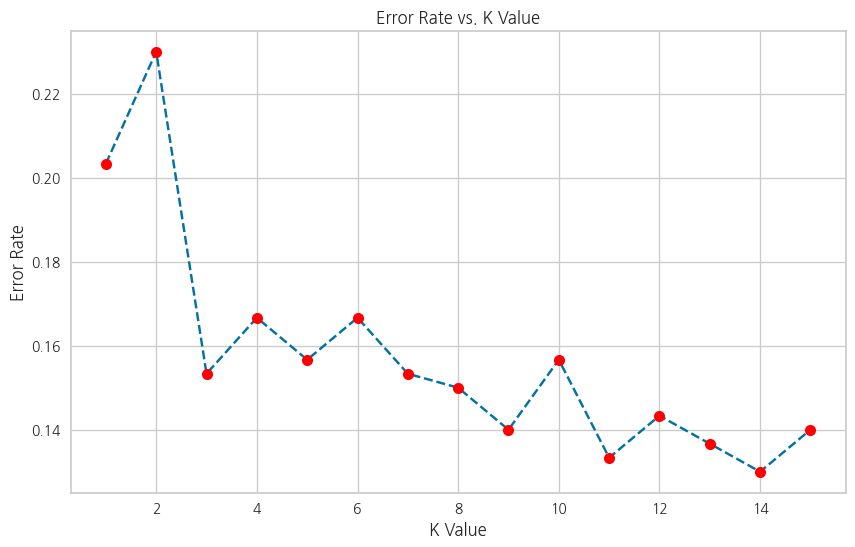

In [100]:
error_rate = []

for i in range(1, 16):
    knn_i = KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(df_train_x, df_train_y)
    y_pred_i = knn_i.predict(df_test_x)
    error_rate.append(np.mean(y_pred_i != df_test_y))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), error_rate, marker='o', linestyle='dashed', markersize=8, markerfacecolor='red')
plt.title("Error Rate vs. K Value")
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.show()